In [69]:
# import relevant commands
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [101]:
# Reading the FractureGrowth dateset Exploring the growth
growth = pd.read_csv('fracturegrowthdata.csv')
growth.head(142)

,Crack_id,Young's Modulus (GPa),Poisson's ratio,Tensile strength (MPa),Compressive Strength (MPa),Density (g/cm3),Friction coefficient,Inclination angle,X,Y,Fracture Growth
0,1,2.9,0.44,75,139,1.18,0.53,0,1.738301,5.033113,1
1,1,2.9,0.44,75,139,1.18,0.53,0,1.854195,5.033113,1
2,1,2.9,0.44,75,139,1.18,0.53,0,1.970089,5.033113,1
3,1,2.9,0.44,75,139,1.18,0.53,0,2.052870,5.033113,1
4,1,2.9,0.44,75,139,1.18,0.53,0,2.168765,5.033113,1
...,...,...,...,...,...,...,...,...,...,...,...
137,1,2.9,0.44,75,139,1.18,0.53,0,3.316137,3.526490,0
138,1,2.9,0.44,75,139,1.18,0.53,0,3.317618,3.079470,0
139,1,2.9,0.44,75,139,1.18,0.53,0,3.318988,2.665563,0
140,1,2.9,0.44,75,139,1.18,0.53,0,3.320249,2.284768,0


In [71]:
growth.describe()

,Crack_id,Young's Modulus (GPa),Poisson's ratio,Tensile strength (MPa),Compressive Strength (MPa),Density (g/cm3),Friction coefficient,Inclination angle,X,Y,Fracture Growth
count,142.0,1.420000e+02,1.420000e+02,142.0,142.0,1.420000e+02,1.420000e+02,142.0,142.000000,142.000000,142.00000
mean,1.0,2.900000e+00,4.400000e-01,75.0,139.0,1.180000e+00,5.300000e-01,0.0,2.709538,4.959076,0.50000
std,0.0,6.239257e-15,8.356148e-16,0.0,0.0,4.010951e-15,7.799071e-16,0.0,0.505734,1.724551,0.50177
min,1.0,2.900000e+00,4.400000e-01,75.0,139.0,1.180000e+00,5.300000e-01,0.0,1.738301,1.953642,0.00000
25%,1.0,2.900000e+00,4.400000e-01,75.0,139.0,1.180000e+00,5.300000e-01,0.0,2.289360,3.530629,0.00000
50%,1.0,2.900000e+00,4.400000e-01,75.0,139.0,1.180000e+00,5.300000e-01,0.0,2.871365,5.008278,0.50000
75%,1.0,2.900000e+00,4.400000e-01,75.0,139.0,1.180000e+00,5.300000e-01,0.0,3.099604,6.320364,1.00000
max,1.0,2.900000e+00,4.400000e-01,75.0,139.0,1.180000e+00,5.300000e-01,0.0,3.509934,8.029801,1.00000


<Figure size 432x288 with 0 Axes>

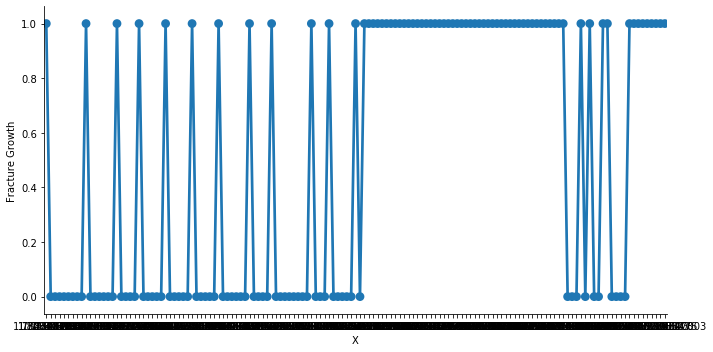

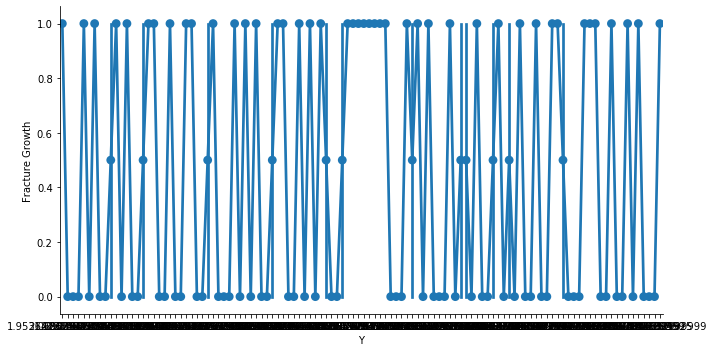

In [72]:
for i, col in enumerate(['X', 'Y']):
    plt.figure(i)
    sns.catplot(x=col, y='Fracture Growth', data=growth, kind='point', aspect=2,)

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
features = growth.drop('Fracture Growth', axis=1)
labels = growth['Fracture Growth']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [75]:
for dataset in(y_train, y_val, y_test):
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


In [76]:
print(len(labels), len(y_train), len(y_val), len(y_test))

142 85 29 28


In [77]:
# Write out train, test, validation data
X_train.to_csv('Fracture_train_features.csv' , index=False)
X_val.to_csv('Fracture_val_features.csv' , index=False)
X_test.to_csv('Fracture_test_features.csv' , index=False)

y_train.to_csv('Fracture_train_labels.csv' , index=False)
y_val.to_csv('Fracture_val_labels.csv' , index=False)
y_test.to_csv('Fracture_test_labels.csv' , index=False)

In [78]:
# Logistic Regression Model
# Gives potential hyperparameters we could tune. We would tune the one which has the largest impact
# The C hyperparameter is regularisation parameter is logistic reg that controls how closely model fits to training data
# More value of C, less regularization and classification good, if less C then more regularization and underfitting
from sklearn.linear_model import LogisticRegression

LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
import joblib
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv('Fracture_train_features.csv')
tr_labels = pd.read_csv('Fracture_train_labels.csv', header=None)

In [91]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3), round(std * 2, 3), params))

In [92]:
# Logistic Regression with 4-fold cross validation and tuning the hyperparameter C
# Shows that model underfits when low C & high Regularization & less accuracy; C=1 best accuracy; model overfits when high C & low Reg
# 7 hyperparameters and 10 cross val so 7*10 = 70 individual models
# Best is 78% as below
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}

cv = GridSearchCV(lr, parameters, cv=10)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 10}

0.553 (+/-0.087) for {'C': 0.001}
0.553 (+/-0.087) for {'C': 0.01}
0.581 (+/-0.279) for {'C': 0.1}
0.758 (+/-0.301) for {'C': 1}
0.781 (+/-0.269) for {'C': 10}
0.781 (+/-0.269) for {'C': 100}
0.781 (+/-0.269) for {'C': 1000}


In [93]:
cv.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
# Write out pickled model
joblib.dump(cv.best_estimator_,'FGLR_model.pkl')

['FGLR_model.pkl']

In [95]:
# Evaluate results on the validation set
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

val_features = pd.read_csv('Fracture_val_features.csv')
val_labels = pd.read_csv('Fracture_val_labels.csv', header=None)

te_features = pd.read_csv('Fracture_test_features.csv')
te_labels = pd.read_csv('Fracture_test_labels.csv', header=None)

In [96]:
models = {}

for mdl in ['FGLR']:
    models[mdl] = joblib.load('{}_model.pkl'.format(mdl))

In [97]:
models

{'FGLR': LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False)}

In [98]:
# Evaluate models on the validation set
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name, accuracy, precision, recall, round((end - start))))

In [99]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

FGLR -- Accuracy: 0.897 / Precision: 1.0 / Recall: 0.842 / Latency: 0ms


In [100]:
for name, mdl in models.items():
    evaluate_model(name, mdl, te_features, te_labels)

FGLR -- Accuracy: 0.929 / Precision: 0.929 / Recall: 0.929 / Latency: 0ms
